# Write a KDE estimator with beta kernel and compare to Gaussian KDE for data in the unit interval.

In [55]:
from scipy.stats import beta
import numpy as np

In [56]:
def kernel_pdf_raw(x):
    x = np.atleast_1d(x)  # Ensure x is an array
    pdf_values = np.mean(norm.pdf(x[:, None], loc=data, scale=h * sigma), axis=1)
    if pdf_values.size == 1:  # Check if the result is a single value
        return pdf_values.item()  # Convert single-element array to scalar
    return pdf_values

def kernel_cdf_raw(x):
    x = np.atleast_1d(x)  # Ensure x is an array
    cdf_values = np.mean(norm.cdf(x[:, None], loc=data, scale=h * sigma), axis=1)
    if cdf_values.size == 1:  # Check if the result is a single value
        return cdf_values.item()  # Convert single-element array to scalar
    return cdf_values

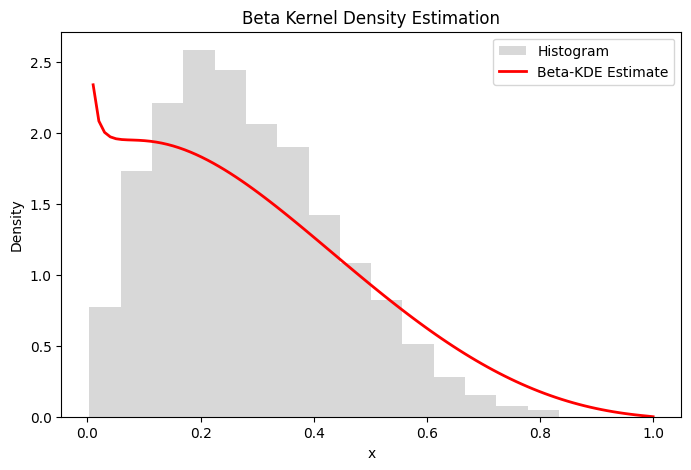

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

def beta_kde(x, data, h):
    """
    Compute the Beta-KDE estimate at points x using data and bandwidth h.
    
    Parameters:
    - x: Points at which to evaluate the KDE.
    - data: Sample data points.
    - h: Bandwidth parameter controlling the spread of each beta kernel.

    Returns:
    - Estimated density values at x.
    """
    n = len(data)
    kde_estimate = np.zeros_like(x)

    for i in range(n):
        # Compute Beta shape parameters
        alpha_i = (data[i] * (1 - h)) / h
        beta_i = ((1 - data[i]) * (1 - h)) / h
        
        # Evaluate Beta pdf at each x point
        kde_estimate += beta.pdf(x, alpha_i, beta_i)
    
    return kde_estimate / n  # Normalize

# Generate synthetic bounded data in [0,1]
np.random.seed(42)
data = np.random.beta(a=2, b=5, size=5000)  # Sample from a beta distribution

# Define evaluation points
x = np.linspace(0, 1, 100)

# Choose bandwidth (small values lead to sharper peaks)
h = 0.1

# Compute Beta-KDE estimate
density = beta_kde(x, data, h)

# Plot results
plt.figure(figsize=(8, 5))
plt.hist(data, bins=15, density=True, alpha=0.3, color='gray', label="Histogram")
plt.plot(x, density, color='red', label="Beta-KDE Estimate", lw=2)
plt.xlabel("x")
plt.ylabel("Density")
plt.title("Beta Kernel Density Estimation")
plt.legend()
plt.show()


In [58]:
from online_cp import PluginMartingale
M = PluginMartingale(warnings=False)

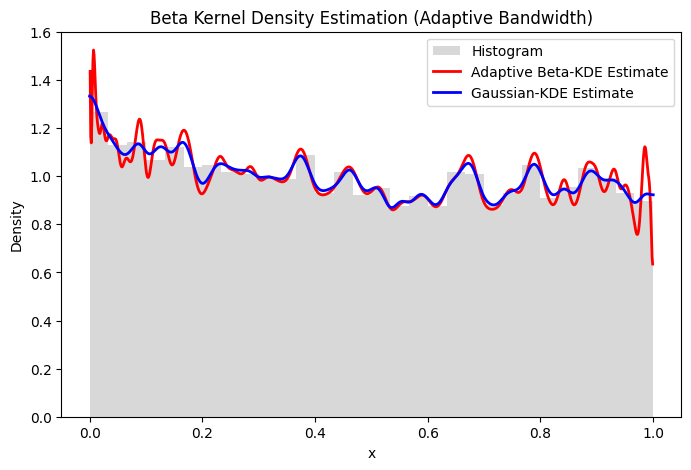

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
from scipy.spatial import KDTree

def adaptive_bandwidth(data, k=10):
    """
    Compute an adaptive bandwidth for each data point based on k-nearest neighbors.
    
    Parameters:
    - data: Sample data points.
    - k: Number of nearest neighbors to consider.

    Returns:
    - Adaptive bandwidth values for each data point.
    """
    tree = KDTree(data.reshape(-1, 1))
    distances, _ = tree.query(data.reshape(-1, 1), k=k+1)  # k+1 to exclude self-distance
    h_values = distances[:, -1]  # Use the k-th nearest neighbor distance
    return h_values

# def adaptive_bandwidth(data, c=1.0):
#     # Compute local spacing (distance between consecutive points)
#     sorted_data = np.sort(data)
#     local_spacing = np.diff(sorted_data)
    
#     # Estimate bandwidth for each point based on local spacing
#     bandwidths = c * local_spacing  # Local bandwidth dependent on spacing
#     return bandwidths

def beta_kde_adaptive(x, data, h_values):
    """
    Compute the Beta-KDE estimate at points x using adaptive bandwidths.

    Parameters:
    - x: Points at which to evaluate the KDE.
    - data: Sample data points.
    - h_values: Adaptive bandwidths for each data point.

    Returns:
    - Estimated density values at x.
    """
    n = len(data)
    alpha = (data * (1 - h_values)) / h_values
    beta_param = ((1 - data) * (1 - h_values)) / h_values

    kde_estimate = np.sum(beta.pdf(x[:, None], alpha, beta_param), axis=1)
    
    return kde_estimate / n  # Normalize

# Generate synthetic bounded data in [0,1]
np.random.seed(42)
data = np.random.beta(a=2, b=5, size=500)  # Larger dataset
data = np.load('../data/data_martingale_experiment/p_values_usps_orig.npy')

for p in data:
    M.update_martingale_value(p)

# Define evaluation points
x = np.linspace(0, 1, 1000)

# Compute adaptive bandwidths using k-nearest neighbors
h_values = adaptive_bandwidth(data, k=20)

# Compute Beta-KDE estimate with adaptive bandwidth
density = beta_kde_adaptive(x, data, h_values)

Gaussian_density = M.b_n(x)

true_density = beta.pdf(x, a=2, b=5)

# Plot results
plt.figure(figsize=(8, 5))
plt.hist(data, bins=30, density=True, alpha=0.3, color='gray', label="Histogram")
plt.plot(x, density, color='red', label="Adaptive Beta-KDE Estimate", lw=2)
plt.plot(x, Gaussian_density, color='blue', label="Gaussian-KDE Estimate", lw=2)
# plt.plot(x, true_density, color='green', label="Truth", lw=2)


plt.xlabel("x")
plt.ylabel("Density")
plt.title("Beta Kernel Density Estimation (Adaptive Bandwidth)")
plt.legend()
plt.show()


In [63]:
f = lambda x: beta_kde_adaptive(x, data, h_values)

In [64]:
N = 1000000
-np.log(M.b_n(data[:N])).mean(), -np.log(f(data[:N])).mean()

(-0.004689515419774901, -0.0054569720044382874)

In [ ]:
def beta_kde_adaptive(x, data, h_values):
    """
    Compute the Beta-KDE estimate at points x using adaptive bandwidths.

    Parameters:
    - x: Points at which to evaluate the KDE.
    - data: Sample data points.
    - h_values: Adaptive bandwidths for each data point.

    Returns:
    - Estimated density values at x.
    """
    n = len(data)
    alpha = (data * (1 - h_values)) / h_values
    beta_param = ((1 - data) * (1 - h_values)) / h_values

    kde_estimate = np.sum(beta.pdf(x[:, None], alpha, beta_param), axis=1)
    
    return kde_estimate / n  # Normalize
